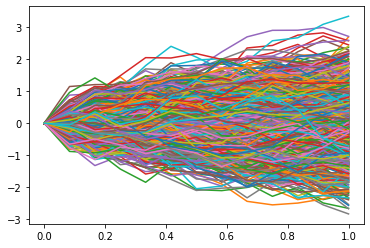

In [5]:
# Simulating Brownian Motion

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

T = 1  # 1년
M = 12 # 1달에 한번 관측 
N = int(1e3)
dt = T/M

W = np.zeros((N,M+1)) # N by M+1 matrix
t = np.zeros(M+1)     # M+1개의 vectors
for i in range(M):
    Y = np.random.randn(N)*np.sqrt(dt) # 분산이 sqrt(dt)인 정규분포 Y
    W[:,i+1] = W[:,i] + Y
    t[i+1] = t[i] + dt
    
plt.plot(t, W.T) # W의 Transpose 행렬
plt.show()

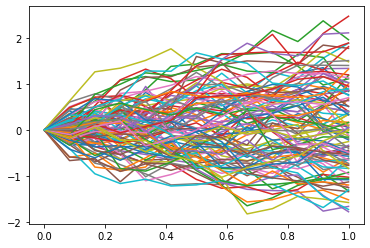

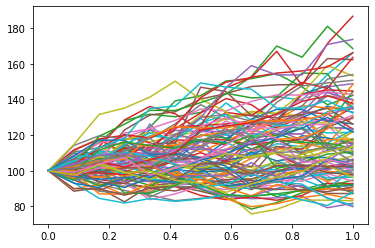

In [7]:
# Simulating BM vs. Geometric Brownian Motion

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

T = 1  # 1년
M = 12 # 1달에 한번 관측 
N = int(1e2)
dt = T/M

# W, t = BM
W = np.zeros((N,M+1)) # N by M+1 matrix
t = np.zeros(M+1)     # M+1개의 vectors

# St = GBM
S0 = 100; mu= 0.15; sig=0.2; r=0.02 # 기대수익률(mu) 15%의 상품, 변동성(sig, 표준편차) 20%
St = np.zeros((N,M+1))
St[:,0] = S0


for i in range(M):
    Y = np.random.randn(N)*np.sqrt(dt) # 분산이 sqrt(dt)인 정규분포 Y
    W[:,i+1] = W[:,i] + Y
    t[i+1] = t[i] + dt
    St[:,i+1] = S0*np.exp((mu-sig*sig/2)*t[i+1]+sig*W[:,i+1]) # St의 모든열 중 i+1번째 행에 S0*exp를 대입
    
plt.plot(t, W.T) # W의 Transpose 행렬
plt.show()

plt.plot(t,St.T)
plt.show()

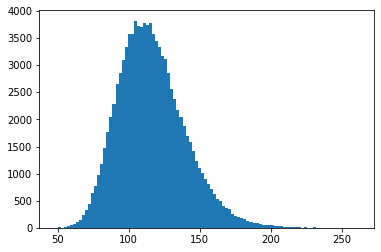

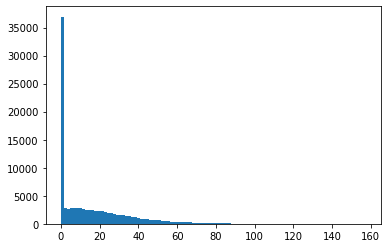

15.258305548485616

In [13]:
# BSMOPM : European Call option

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

T = 1  # 1년
N = int(1e5)

# W, t = BM
W_T = np.random.randn(N)*np.sqrt(T)

# St = GBM
S0 = 100; mu= 0.15; sig=0.2; r=0.02; K=105 # 기대수익률(mu) 15%의 상품, 변동성(sig, 표준편차) 20%, 행사가격(K) = $105
S_T = S0*np.exp((mu-sig*sig/2)*T + sig*W_T)
C_T = (S_T - K)*(S_T >= K)

plt.hist(S_T, 100)
plt.show()

plt.hist(C_T, 100)
plt.show()

C_0 = np.exp(-r*T)*np.mean(C_T)
C_0

#for i in range(M):
#    Y = np.random.randn(N)*np.sqrt(dt) # 분산이 sqrt(dt)인 정규분포 Y
#    W[:,i+1] = W[:,i] + Y
#    t[i+1] = t[i] + dt
#    St[:,i+1] = S0*np.exp((mu-sig*sig/2)*t[i+1]+sig*W[:,i+1]) # St의 모든열 중 i+1번째 행에 S0*exp를 대입
    
#plt.plot(t, W.T) # W의 Transpose 행렬
#plt.show()

#plt.plot(t,St.T)
#plt.show()

In [14]:
X = np.array([1,3,5,2,4])
Y = (X>=3) # indicator func.
Z = np.sum(Y) # True의 개수를 sum

Y
Z

3

In [16]:
###########################################
##  Black-Scholes-Merton Option Pricing  ##
##  written by Baeho Kim                 ##
###########################################

import numpy as np
from scipy import stats

## BSM closed-form solution (for call) ##
def bsm_call_value(S0, K, T, r, sigma):
    d1= (np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2= (np.log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    call_value = (S0*stats.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    return call_value

# Put-Call Parity를 통해 구할 수 있음
#def bsm_put_value(S0, K, T, r, sigma):
    #put_value = bsm_call_value(S0, K, T, r, sigma) (S0*stats.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    #return put_value

## BSMOPM parameter setting ##
S_0= 100.
K= 105.
T= 1. # 1년만기 옵션 상품
r= 0.05
sigma= 0.2

## Monte Carlo Simulation ##
N = int(1e5)         # Number of sample paths
W_T = np.random.normal(loc=0.0, scale=np.sqrt(T), size=N) # BM
S_T = S_0*np.exp((r-0.5*sigma*sigma)*T + sigma*W_T) # GBM 모델의 T시점의 주식가격
C_0 = np.exp(-r*T)*(S_T-K)*(S_T > K)
print('Estimated Call Price (95% C.I.) = ',np.mean(C_0),' ± ',1.96*np.std(C_0)/np.sqrt(N)) # N수가 많아서 ddof=1 생략(무시)
print('True Call Price = ', bsm_call_value(S_0,K,T,r,sigma))

Estimated Call Price (95% C.I.) =  8.012399694308549  ±  0.08175828468096666
True Call Price =  8.021352235143176


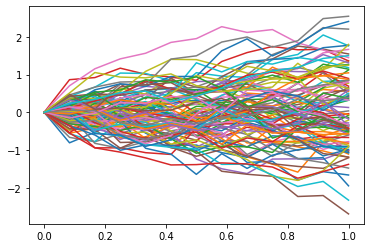

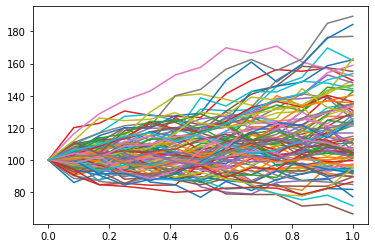

In [18]:
# sampling BM from Multivariate Normal (Generating a vector of BMs)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

T = 1  # 1년
M = 12 # 1달에 한번 관측 
N = int(1e2)
dt = T/M

# W, t = BM
W = np.zeros((N,M+1)) # N by M+1 matrix
t = np.zeros(M+1)     # M+1개의 vectors

# St = GBM
S0 = 100; mu= 0.15; sig=0.2; r=0.02 # 기대수익률(mu) 15%의 상품, 변동성(sig, 표준편차) 20%
St = np.zeros((N,M+1))
St[:,0] = S0

mu_vec = np.zeros(M+1)
Sig_matrix = np.zeros((M+1,M+1))


for i in range(M+1):
    for j in range(M+1):
        if(i>=j):
            Sig_matrix[i,j] = j*dt
        else:
            Sig_matrix[i,j] = i*dt
        
W = np.random.multivariate_normal(mu_vec, Sig_matrix,N)

St = np.zeros((N,M+1))
St[:,0] = S0


for i in range(M):
    t[i+1] = t[i] + dt
    St[:,i+1] = S0*np.exp((mu-sig*sig/2)*t[i+1]+sig*W[:,i+1]) # St의 모든열 중 i+1번째 행에 S0*exp를 대입
        
plt.plot(t, W.T) # W의 Transpose 행렬
plt.show()

plt.plot(t,St.T)
plt.show()

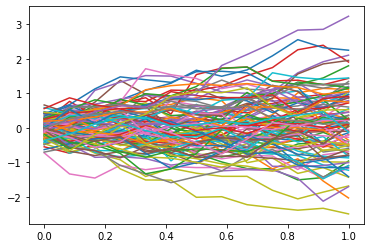

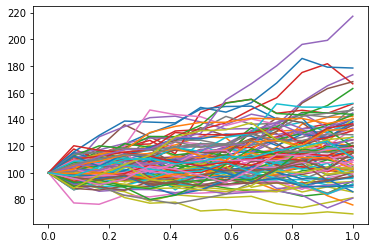

In [19]:
# equivalently, we can simulate W = AZ, where Z~N(0,1) ==> AA_T = SIGMA

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

T = 1  # 1년
M = 12 # 1달에 한번 관측 
N = int(1e2)
dt = T/M

# W, t = BM
W = np.zeros((N,M+1)) # N by M+1 matrix
t = np.zeros(M+1)     # M+1개의 vectors

# St = GBM
S0 = 100; mu= 0.15; sig=0.2; r=0.02 # 기대수익률(mu) 15%의 상품, 변동성(sig, 표준편차) 20%
St = np.zeros((N,M+1))
St[:,0] = S0

mu_vec = np.zeros(M+1)
A = np.zeros((M+1,M+1))

for i in range(M+1):
    for j in range(M+1):
        if(i>=j):
            A[i,j] = np.sqrt(dt)
            
eye_M = np.eye(M+1)
Z = np.random.multivariate_normal(mu_vec,eye_M,N)
W = np.dot(A, Z.T) # 행렬 dot product 계산
W = W.T

St = np.zeros((N,M+1))
St[:,0] = S0


for i in range(M):
    t[i+1] = t[i] + dt
    #St[:,i+1] = S0*np.exp((mu-sig*sig/2)*t[i+1]+sig*W[:,i+1]) # St의 모든열 중 i+1번째 행에 S0*exp를 대입
    St = S0*np.exp((mu-sig*sig/2)*t+sig*W) # St의 모든열 중 i+1번째 행에 S0*exp를 대입
        
plt.plot(t, W.T) # W의 Transpose 행렬
plt.show()

plt.plot(t,St.T)
plt.show()
